In [2]:
# Copyright (c) 2017, MD2K Center of Excellence
# - Nasir Ali <nasir.ali08@gmail.com>
# - Timothy Hnat <twhnat@memphis.edu>
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
#
# * Redistributions of source code must retain the above copyright notice, this
# list of conditions and the following disclaimer.
#
# * Redistributions in binary form must reproduce the above copyright notice,
# this list of conditions and the following disclaimer in the documentation
# and/or other materials provided with the distribution.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
# FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
# DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
# SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
# CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

import datetime
import uuid
from typing import List
from uuid import UUID

from datetime import datetime
from typing import Any
import sys
import json
import codecs
import gzip

class DataPoint:
    def __init__(self,
                 start_time: datetime = None,
                 end_time: datetime = None,
                 sample: Any = None):
        self._start_time = start_time
        self._end_time = end_time
        self._sample = sample

    @property
    def sample(self):
        return self._sample

    @sample.setter
    def sample(self, val):
        self._sample = val

    @property
    def start_time(self):
        return self._start_time

    @start_time.setter
    def start_time(self, val):
        self._start_time = val

    @property
    def end_time(self):
        return self._end_time

    @end_time.setter
    def end_time(self, val):
        self._end_time = val

    @classmethod
    def from_tuple(cls, start_time: datetime, sample: Any, end_time: datetime = None):
        return cls(start_time, end_time, sample)

    def __str__(self):
        return str(self.start_time) + " - " + str(self.sample)

    def __repr__(self):
        return 'DataPoint(' + ', '.join(map(str, [self.start_time, self.end_time, self.sample]))


class DataStream:
    def __init__(self,
                 identifier: UUID = None,
                 owner: UUID = None,
                 name: UUID = None,
                 data_descriptor = [],
                 execution_context = {},
                 annotations: List = [],
                 stream_type: str = "1",
                 start_time: datetime = None,
                 end_time: datetime = None,
                 data: List[DataPoint] = None
                 ):
        self._identifier = identifier
        self._owner = owner
        self._name = name
        self._data_descriptor = data_descriptor
        self._datastream_type = stream_type
        self._execution_context = execution_context
        self._annotations = annotations
        self._start_time = start_time
        self._end_time = end_time
        self._data = data


    @property
    def identifier(self):
        return self._identifier

    @property
    def owner(self):
        return self._owner

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        self._name = value

    @property
    def start_time(self):
        return self._start_time

    @start_time.setter
    def start_time(self, val):
        self._start_time = val

    @property
    def end_time(self):
        return self._end_time

    @end_time.setter
    def end_time(self, val):
        self._end_time = val

    @property
    def datastream_type(self):
        return self._datastream_type

    @property
    def data(self):
        return self._data

    def __str__(self):
        return str(self.identifier) + " - " + str(self.owner) + " - " + str(self.data)

    def __repr__(self):
        result = "Stream(" + ', '.join(map(str, [self.identifier,
                                                 self.owner,
                                                 self.name,
                                                 self.data_descriptor,
                                                 self.datastream_type,
                                                 self.execution_context,
                                                 self.annotations]))
        return result

def convert_sample(sample):
    return list([float(x.strip()) for x in sample.split(',')])


def line_parser(input):
    ts, offset, sample = input.split(',', 2)
    start_time = int(ts) / 1000.0
    offset = int(offset)
    return DataPoint(datetime.fromtimestamp(start_time), convert_sample(sample))


def load_datastream(filebase):
    metadata = {}
    with codecs.open(filebase + '.json', encoding='utf-8', errors='ignore') as f:
        metadata = json.loads(f.read())

    fp = gzip.open(filebase + '.gz')
    gzip_file_content = fp.read()
    fp.close()
    gzip_file_content = gzip_file_content.decode('utf-8')

    lines = gzip_file_content.splitlines()
    data = list(map(line_parser, lines))

    identifier = uuid.UUID(metadata['identifier'])
    owner = uuid.UUID(metadata['owner'])
    name = metadata['name']
    data_descriptor = metadata['data_descriptor']
    execution_context = metadata['execution_context']
    annotations = metadata['annotations']
    stream_type = "1"
    start_time = data[0].start_time
    end_time = data[-1].start_time

    return DataStream(identifier,owner,name,
    data_descriptor,
    execution_context,
    annotations,
    stream_type,
    start_time,
    end_time,
    data)


def save_datastream(datastream):
    print(datastream)
    print(datastream.data)
    pass


def count(datastream):

    identifier = uuid.uuid1()
    name = datastream.name + '--COUNT'
    execution_context = {}
    annotations = {}
    data_descriptor = []


    data = [DataPoint(datastream.data[0].start_time, datastream.data[-1].start_time, len(datastream.data))]
    start_time = data[0].start_time
    end_time = data[-1].start_time

    return DataStream(identifier, datastream.owner, name, data_descriptor,
    execution_context,
    annotations,
    "1",
    start_time,
    end_time,
    data)

if __name__ == '__main__':
    filename = '7007221c-1aec-4481-aee2-200c7e61533d'

#     datastream = load_datastream(sys.argv[1])
    datastream = load_datastream(filename)
    number_entries = count(datastream)
    save_datastream(number_entries)


1e3fd75a-d5a8-11e7-86bc-dc4a3ef77099 - 636fcc1f-8966-4e63-a9df-0cbaa6e9296c - [DataPoint(2017-10-07 13:59:56.441000, 2017-10-07 14:59:55.598000, 86535]
[DataPoint(2017-10-07 13:59:56.441000, 2017-10-07 14:59:55.598000, 86535]


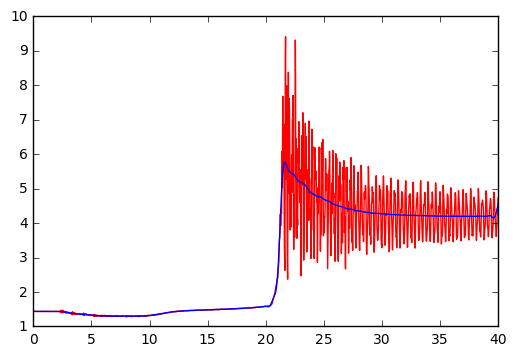

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

data = np.loadtxt('data.dat', skiprows=2, delimiter=',', unpack=True).transpose()
time = data[:,0]
pressure = data[:,1]
cutoff = 1500
fs = 50000
pressure_smooth = butter_lowpass_filtfilt(pressure, cutoff, fs)

figure_pressure_trace = plt.figure()
figure_pressure_trace.clf()
plot_P_vs_t = plt.subplot(111)
plot_P_vs_t.plot(time, pressure, 'r', linewidth=1.0)
plot_P_vs_t.plot(time, pressure_smooth, 'b', linewidth=1.0)
plt.show()
# plt.close()

In [7]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

data = pd.read_table("data.dat", sep=",", names=["time", "pressure"])
sub_data = data

result = lowess(sub_data['pressure'], sub_data['time'])
x_smooth = result[:,0]
y_smooth = result[:,1]

tot_result = lowess(data.pressure, data.time.values, frac=0.1)
x_tot_smooth = tot_result[:,0]
y_tot_smooth = tot_result[:,1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data.time.values, data.pressure, label="raw")
ax.plot(x_tot_smooth, y_tot_smooth, label="lowess 1%", linewidth=3, color="g")
ax.plot(x_smooth, y_smooth, label="lowess", linewidth=3, color="r")
plt.legend()

ValueError: could not convert string to float: '(bar)'

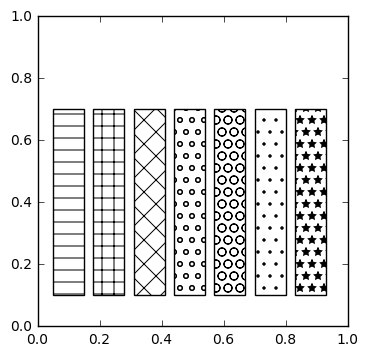

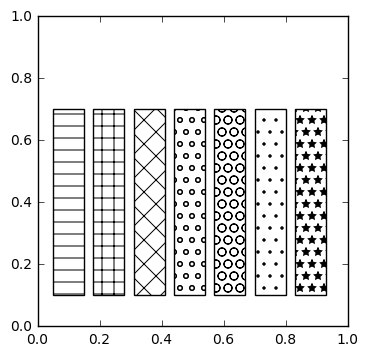

In [28]:
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.pyplot as plt
import matplotlib.patches as patches

patterns = ['-', '+', 'x', 'o', 'O', '.', '*']  # more patterns
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, aspect='equal')
for p in [
    patches.Rectangle(
        (0.05 + (i * 0.13), 0.1),
        0.1,
        0.6,
        hatch=patterns[i],
        fill=False
    ) for i in range(len(patterns))
]:
    ax4.add_patch(p)
# fig4.savefig('rect4.png', dpi=90, bbox_inches='tight')
plt.show()



import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')
for p in [
    patches.Rectangle(
        (0.1, 0.1), 0.3, 0.6,
        hatch='/'
    ),
    patches.Rectangle(
        (0.5, 0.1), 0.3, 0.6,
        hatch='\\',
        fill=False
    ),
]:
    ax3.add_patch(p)

    
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
    )
)
fig1.savefig('rect1.png', dpi=90, bbox_inches='tight')

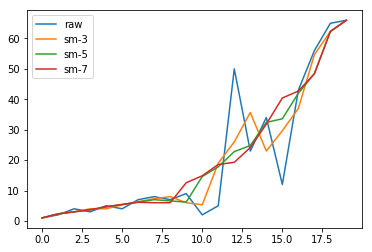

[0, 0, 0, 0, 0]


In [2]:
# Shooth function: moving average of n values
import numpy as np
import matplotlib.pylab as plt

def smooth(a,WSZ):
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

A = [1, 2, 4, 3, 5, 4, 7, 8, 7, 9, 2, 5, 50, 23, 34, 12, 43, 56, 65, 66]
B = smooth(A, 3)
C = smooth(A, 5)
D = smooth(A, 7)

plt.plot(A,  label='raw')
plt.plot(B,  label='sm-3')
plt.plot(C,  label='sm-5')
plt.plot(D,  label='sm-7')
plt.legend()
plt.show()

M = [0]*5
print(M)


In [4]:
import pandas as pd
import matplotlib.pylab as plt
import math
import statistics
import numpy as np
import os


def segmentationUsingTwoMovingAverage(slowMovingAverage, fastMovingAverage, THRESHOLD, near):
    indexList = [0]*len(slowMovingAverage)
    curIndex = 0;

    for i in range(len(slowMovingAverage)):
        diff = slowMovingAverage[i] - fastMovingAverage[i]
        if diff > THRESHOLD:
            if curIndex == 0:
                indexList[curIndex] = i
                curIndex = curIndex + 1
                indexList[curIndex] = i
            else:
                if i <= indexList[curIndex] + near :
                    indexList[curIndex] = i
                else:
                    curIndex = curIndex + 1
                    indexList[curIndex] = i
                    curIndex = curIndex + 1
                    indexList[curIndex] = i

    intersectionIndex = [0] * (curIndex+1)
    output = []
    if curIndex > 0:
        for i in range(0, curIndex, 2):
            output.append([indexList[i], indexList[i + 1]])
            intersectionIndex[i] = indexList[i]
            
    return output, intersectionIndex

def calculateRoll(Ax, Ay, Az) :
    roll = []
    for i in range(len(Ax)):
        ax = Ax[i]
        ay = Ay[i]
        az = Az[i]
        rll = 180 * math.atan2(ax, math.sqrt(ay * ay + az * az)) / math.pi
        roll.append(rll)
    return roll

def calculatePitch(Ax, Ay, Az) :
    pitch = []
    for i in range(len(Ax)):
        ax = Ax[i]
        ay = Ay[i]
        az = Az[i]
        ptch = 180 * math.atan2(-ay, -az) / math.pi
        pitch.append(ptch)
    return pitch

def calculateYaw(Ax, Ay, Az) :
    yaw = []
    for i in range(len(Ax)):
        ax = Ax[i]
        ay = Ay[i]
        az = Az[i]
        yw = 180 * math.atan2(ay, ax) / math.pi
        yaw.append(yw)
    return yaw

def AutosenseWristFeatures(Ax, Ay, Az, Gx, Gy, Gz):
    fastSize = 31
    slowSize = 131

    gyr_mag = [1, 2, 4, 3, 5, 4, 7, 8, 7, 9, 2, 5, 50, 23, 34, 12, 43, 56, 65, 66]

    gyr_mag_800 = smooth(gyr_mag, fastSize)
    gyr_mag_8000 = smooth(gyr_mag, slowSize)
    
    gyr_intersections = segmentationUsingTwoMovingAverage(gyr_mag_800, gyr_mag_8000, 0, 4)
    
    roll = calculateRoll(Ax, Ay, Az)
    pitch = calculatePitch(Ax, Ay, Az)
    yaw = calculateYaw(Ax, Ay, Az)
    
def getData(cur_dir, filename):
    col_name = ['timestamp', 'value']
    D = pd.read_csv(cur_dir + filename, names = col_name)
    return D['timestamp'], D['value']

def getMag(x, y, z):
    mag = [0]*len(x)
    for i in range(len(x)):
        mag[i] = math.sqrt(x.iloc[i]*x.iloc[i] + y.iloc[i]*y.iloc[i]+z.iloc[i]*z.iloc[i])
        
    return mag

def filterDuration(gyr_intersections, t):
    gyr_intersections_filtered = []
    
    for I in gyr_intersections:
        dur = t[I[1]] - t[I[0]]
        
        if (dur >= 1000.0) & (dur <= 5000.0):
            gyr_intersections_filtered.append(I)
    return gyr_intersections_filtered

def filterRollPitch(gyr_intersections, roll, pitch):
    gyr_intersections_filtered = []
    
    for I in gyr_intersections:
        roll_sub = [roll[i] for i in range(len(roll)) if (i >= I[0]) & (i <= I[1])]
        pitch_sub = [pitch[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        
        mean_roll = statistics.mean(roll_sub)
        mean_pitch = statistics.mean(pitch_sub)
        
#         r > -20 && r <= 65 && p >= -125 && p <= -40
        if (mean_roll > -20) & (mean_roll <= 65) & (mean_pitch >= - 125) & (mean_pitch <= - 40):
            gyr_intersections_filtered.append(I)
    return gyr_intersections_filtered

def computeBasicFeatures(data):
    
    mean = np.mean(data)
    median = np.median(data)
    sd = np.std(data)
    quartile = np.percentile(data, 75) - np.percentile(data, 25)
    
    return mean, median, sd, quartile

def computeWindowFeatures(gyr_intersections, gyr_mag, roll, pitch, yaw, Ax, Ay, Az, t):
    all_features = []
    for I in gyr_intersections:
        roll_sub = [roll[i] for i in range(len(roll)) if (i >= I[0]) & (i <= I[1])]
        pitch_sub = [pitch[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        yaw_sub = [yaw[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        
        Ax_sub = [Ax[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        Ay_sub = [Ay[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        Az_sub = [Az[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        
        Gmag_sub = [gyr_mag[i] for i in range(len(pitch)) if (i >= I[0]) & (i <= I[1])]
        
        duration = t[I[1]] - t[I[0]]
        
        roll_mean, roll_median, roll_sd, roll_quartile = computeBasicFeatures(roll_sub)
        pitch_mean, pitch_median, pitch_sd, pitch_quartile = computeBasicFeatures(pitch_sub)
        yaw_mean, yaw_median, yaw_sd, yaw_quartile = computeBasicFeatures(yaw_sub)
        
        gyro_mean, gyro_median, gyro_sd, gyro_quartile = computeBasicFeatures(Gmag_sub)
        
        f = [t[I[0]], duration, roll_mean, roll_median, roll_sd, roll_quartile, pitch_mean, pitch_median, pitch_sd, pitch_quartile, yaw_mean, yaw_median, yaw_sd, yaw_quartile, gyro_mean, gyro_median, gyro_sd, gyro_quartile]
        all_features.append(f)
        
#     print(all_features)
    return all_features

def getLabel(st, et, epi_st, epi_et, puff_times):
    label = 0 # not puff
#     print(range(len(puff_times)))
    for i in range(len(puff_times)):
        if (puff_times[i] >= st) & (puff_times[i] <= et):
            label = 1
            return label
    
    for i in range(len(epi_et)):
        if ((epi_st[i] <=st) & (st <= epi_et[i])) | ((epi_st[i] <=et) & (et <= epi_et[i])):
            label = -1 # included episode but not puff
            return label
    
    return label

def getInputData(cur_dir, wrist):
    
    epi_st, epi_et = getData(cur_dir, 'episode_start_end.csv')
    
    if wrist == 0:
        puff_times = pd.read_csv(cur_dir + 'puff_timestamp_leftwrist.csv', names=['timings'])
        puff_times = puff_times['timings']
        puff_times = puff_times.values

        t, Ax = getData(cur_dir, 'left-wrist-accelx.csv')
        t, Ay = getData(cur_dir, 'left-wrist-accely.csv')
        t, Az = getData(cur_dir, 'left-wrist-accelz.csv')

        t, Gx = getData(cur_dir, 'left-wrist-gyrox.csv')
        t, Gy = getData(cur_dir, 'left-wrist-gyroy.csv')
        t, Gz = getData(cur_dir, 'left-wrist-gyroz.csv')
    else:
        puff_times = pd.read_csv(cur_dir + 'puff_timestamp_rightwrist.csv', names=['timings'])
        puff_times = puff_times['timings']
        puff_times = puff_times.values

        t, Ax = getData(cur_dir, 'right-wrist-accelx.csv')
        t, Ay = getData(cur_dir, 'right-wrist-accely.csv')
        t, Az = getData(cur_dir, 'right-wrist-accelz.csv')

        t, Gx = getData(cur_dir, 'right-wrist-gyrox.csv')
        t, Gy = getData(cur_dir, 'right-wrist-gyroy.csv')
        t, Gz = getData(cur_dir, 'right-wrist-gyroz.csv')
    
    return t, Ax, Ay, Az, Gx, Gy, Gz, epi_st, epi_et, puff_times
    
if __name__ == '__main__':
#     cur_dir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\wristdata\\'
#     cur_dir = 'C:\\Users\\sakther\\DATA\\csvdataSI_new\\p03\\s03\\'

    fastSize = 13
    slowSize = 131
    
    data_dir = '/home/nsaleheen/data/csvdataSI_new/'

    pids = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06']
#     pids = ['p05']
    Xs = []
    Ys = []
    nSample = 0
    nPuff = 0
    nPuffCand=0
    nNonPuffCand=0

    for i in range(len(pids)):
        basedir = data_dir + pids[i] + '/'
        sids = [d for d in os.listdir(basedir) if os.path.isdir(os.path.join(basedir, d))]     

        for j in range(len(sids)):
            cur_dir = data_dir + pids[i] + '/' + sids[j] + '/'
            print(cur_dir)
            
            for wrist in range(2): # 0 for left wrist, 1 for right wrist
            
                t, Ax, Ay, Az, Gx, Gy, Gz, epi_st, epi_et, puff_times = getInputData(cur_dir, wrist)

                nSample = nSample + len(puff_times)
                nPuff = nPuff + len(puff_times)

                A_mag = getMag(Ax, Ay, Az)
                gyr_mag = getMag(Gx, Gy, Gz)

                roll = calculateRoll(Ax, Ay, Az)
                pitch = calculatePitch(Ax, Ay, Az)
                yaw = calculateYaw(Ax, Ay, Az)

                gyr_mag_800 = smooth(gyr_mag, fastSize)
                gyr_mag_8000 = smooth(gyr_mag, slowSize)
                gyr_intersections, dont_care = segmentationUsingTwoMovingAverage(gyr_mag_8000, gyr_mag_800, 0, 4)
                gyr_intersections = filterDuration(gyr_intersections, t)
                gyr_intersections = filterRollPitch(gyr_intersections, roll, pitch)

                all_features = computeWindowFeatures(gyr_intersections, gyr_mag, roll, pitch, yaw, Ax, Ay, Az, t)

                st = [f[0] for f in all_features]
                et = [f[0]+f[1] for f in all_features]
                labels = [0]*len(st)

                for k in range(len(st)):
                    labels[k] = getLabel(st[k], et[k], epi_st, epi_et, puff_times)
                    if labels[k] != -1:
                        Xs.append(all_features[k][1:])
                        if labels[k] == 0:
                            nNonPuffCand = nNonPuffCand+1
                            Ys.append('non-puff')
                        else:
                            nPuffCand = nPuffCand+1
                            Ys.append('puff')

                print(len(Xs))
    #             print(sum(Ys))     
    print("# of puffs = ", nPuff)
    print("# of puff candidates= ", nPuffCand)
    print("# of non-puff candidates= ", nNonPuffCand)
    
#     print(Xs)
#     print(Ys)

    Xs = np.array(Xs)
    Ys = np.array([Ys])
    M = np.concatenate((Xs, Ys.T), axis=1)

#     df = pd.DataFrame(M)
#     feature_name = ['duration', 'roll_mean', 'roll_median', 'roll_sd', 'roll_quartile', 'pitch_mean', 'pitch_median', 'pitch_sd', 'pitch_quartile', 'yaw_mean', 'yaw_median', 'yaw_sd', 'yaw_quartile', 'gyro_mean', 'gyro_median', 'gyro_sd', 'gyro_quartile', 'label(1:puff; 0:non-puff)']
#     df.to_csv("__file_path.csv", header=feature_name)
    
    


/home/nsaleheen/data/csvdataSI_new/p01/s04/
151
465
/home/nsaleheen/data/csvdataSI_new/p01/s02/
527
617
/home/nsaleheen/data/csvdataSI_new/p01/s05/
830
1135
/home/nsaleheen/data/csvdataSI_new/p01/s03/
1381
1550
/home/nsaleheen/data/csvdataSI_new/p02/s04/
1556
1643
/home/nsaleheen/data/csvdataSI_new/p02/s05/
1644
1658
/home/nsaleheen/data/csvdataSI_new/p02/s07/
1942
2081
/home/nsaleheen/data/csvdataSI_new/p02/s03/
2329
2460
/home/nsaleheen/data/csvdataSI_new/p02/s06/
2518
2550
/home/nsaleheen/data/csvdataSI_new/p03/s02/
2767
2824
/home/nsaleheen/data/csvdataSI_new/p03/s01/
3075
3215
/home/nsaleheen/data/csvdataSI_new/p04/s01/
3227
3251
/home/nsaleheen/data/csvdataSI_new/p05/s01/
3253
3261
/home/nsaleheen/data/csvdataSI_new/p06/s01/
3275
3296
# of puffs =  302
# of puff candidates=  283
# of non-puff candidates=  3013


10534
155
86
14


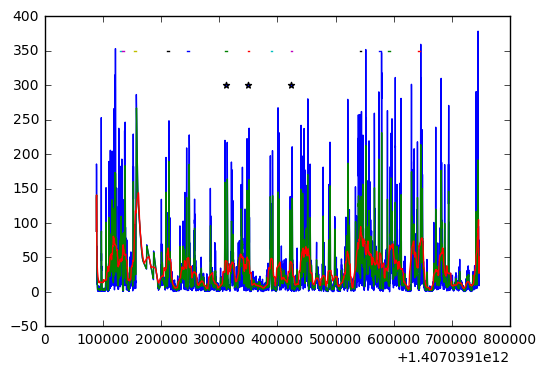

In [85]:

if __name__ == '__main__':
    
    cur_dir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\wristdata\\'
    
    gt = pd.read_csv(cur_dir + 'puffGroundtruth.csv')    
    
    epi_st, epi_et = getData(cur_dir, 'episode_start_end.csv')
    plt.scatter(gt, [300]*len(gt), marker="*")
    
    t, Ax = getData(cur_dir, 'right-wrist-accelx.csv')
    t, Ay = getData(cur_dir, 'right-wrist-accely.csv')
    t, Az = getData(cur_dir, 'right-wrist-accelz.csv')
    
    t, Gx = getData(cur_dir, 'right-wrist-gyrox.csv')
    t, Gy = getData(cur_dir, 'right-wrist-gyroy.csv')
    t, Gz = getData(cur_dir, 'right-wrist-gyroz.csv')    
    
    print(len(tt))
    
    A_mag = getMag(Ax, Ay, Az)
    gyr_mag = getMag(Gx, Gy, Gz)
    
    fastSize = 13
    slowSize = 131

    roll = calculateRoll(Ax, Ay, Az)
    pitch = calculatePitch(Ax, Ay, Az)
    yaw = calculateYaw(Ax, Ay, Az)

    gyr_mag_800 = smooth(gyr_mag, fastSize)
    gyr_mag_8000 = smooth(gyr_mag, slowSize)
    gyr_intersections, dont_care = segmentationUsingTwoMovingAverage(gyr_mag_8000, gyr_mag_800, 0, 4)
    print(len(gyr_intersections))
    gyr_intersections = filterDuration(gyr_intersections, t)
    print(len(gyr_intersections))
    gyr_intersections = filterRollPitch(gyr_intersections, roll, pitch)
    print(len(gyr_intersections))
    
#     for I in gyr_intersections:
#         print(I)
#         print(t[I[1]] - t[I[0]])

    tt = t # t[ (t>epi_st[0]) & (t< epi_et[0])]
    
    gyr_magt = gyr_mag #[gyr_mag[i] for i in range(len(t)) if (t[i]>epi_st[0]) & (t[i]< epi_et[0])]
    gyr_mag800t =gyr_mag_800 # [gyr_mag_800[i] for i in range(len(t)) if (t[i]>epi_st[0]) & (t[i]< epi_et[0])]
    gyr_mag8000t =gyr_mag_8000 #[gyr_mag_8000[i] for i in range(len(t)) if (t[i]>epi_st[0]) & (t[i]< epi_et[0])]
    
    gyr_intersectionst = gyr_intersections # [gyr_intersections[i] for i in range(len(gyr_intersections)) if (gyr_intersections[i][0]>epi_st[0]) & (gyr_intersections[i][0]< epi_et[0])]
    plt.plot(tt, gyr_magt,  label='gyro_mag')
    plt.plot(tt, gyr_mag800t,  label='gyro_mag_800')
    plt.plot(tt, gyr_mag8000t,  label='gyro_mag_8000')

    for I in gyr_intersectionst:
        x1 = t[I[0]]
        x2 = t[I[1]]
        
        plt.plot([x1, x2], [350, 350])

        

    
#     plt.legend()
    plt.show()

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import math
import statistics
import numpy as np
import os

def complementary_filter(ts, acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z, fq=16):

    dt = 1.0/fq  #1/16.0; 
    M_PI =  math.pi;
    hpf = 0.85;
    lpf = 0.15;

    thetaX_acc = [0]*len(acc_x) # math.atan2(-acc_z,acc_y)*180/M_PI;
    thetaY_acc = [0]*len(acc_x) # math.atan2(acc_x,acc_z)*180/M_PI;
    thetaZ_acc = [0]*len(acc_x) # math.atan2(acc_y,acc_x)*180/M_PI;

    thetaX = [0]*len(gyr_x)
    thetaY = [0]*len(gyr_y)
    thetaZ = [0]*len(gyr_z)

    for a in range(len(gyr_x)):
        thetaX_acc[a] = math.atan2(-acc_z[a],acc_y[a])*180/M_PI
        thetaY_acc[a] = math.atan2(acc_x[a],acc_z[a])*180/M_PI
        thetaZ_acc[a] = math.atan2(acc_y[a],acc_x[a])*180/M_PI
        
        if a == 0:
            thetaX[a] = hpf*thetaX[a]*dt + lpf*thetaX_acc[a]
            thetaY[a] = hpf*thetaY[a]*dt + lpf*thetaY_acc[a]
            thetaZ[a] = hpf*thetaZ[a]*dt + lpf*thetaZ_acc[a]
        else:
            thetaX[a] = hpf*(thetaX[a-1] + gyr_x[a]*dt) + lpf*thetaX_acc[a]
            thetaY[a] = hpf*(thetaY[a-1] + gyr_y[a]*dt) + lpf*thetaY_acc[a]
            thetaZ[a] = hpf*(thetaZ[a-1] + gyr_z[a]*dt) + lpf*thetaZ_acc[a]
        end
    end

    
   

p01
C:\Users\sakther\DATA\csvdataSI_new\p01\s02\
C:\Users\sakther\DATA\csvdataSI_new\p01\s03\
C:\Users\sakther\DATA\csvdataSI_new\p01\s04\
C:\Users\sakther\DATA\csvdataSI_new\p01\s05\
p02
C:\Users\sakther\DATA\csvdataSI_new\p02\s03\
C:\Users\sakther\DATA\csvdataSI_new\p02\s04\
C:\Users\sakther\DATA\csvdataSI_new\p02\s05\
C:\Users\sakther\DATA\csvdataSI_new\p02\s06\
C:\Users\sakther\DATA\csvdataSI_new\p02\s07\
p03
C:\Users\sakther\DATA\csvdataSI_new\p03\s01\
C:\Users\sakther\DATA\csvdataSI_new\p03\s02\
p04
C:\Users\sakther\DATA\csvdataSI_new\p04\s01\
p05
C:\Users\sakther\DATA\csvdataSI_new\p05\s01\
C:\Users\sakther\DATA\csvdataSI_new\p05\wristdata\
p06
C:\Users\sakther\DATA\csvdataSI_new\p06\s01\


In [8]:
print(sum([1, 1, 0]))

2
